In [159]:
# Import Libraries
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance

In [160]:
# Getting data from yahoo finance
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)
# Using BTC-USD ticker for Bitcoin cryptocurrency
ticker = 'BTC-USD'
# Downloading data from Yahoo Fianance
data = yf.download(ticker, start=start_date, end=end_date)
# Converting downloaded data into dataframe
df = pd.DataFrame(data)
# Reset and set date as index column
df.reset_index(inplace=True)
df.set_index('Date', inplace=True)

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-11,8004.243652,8026.394043,7772.803711,7927.714355,7927.714355,17107279932
2019-06-12,7925.434082,8196.648438,7862.359863,8145.857422,8145.857422,19034432883
2019-06-13,8145.545410,8311.567383,8087.061035,8230.923828,8230.923828,18669407147
2019-06-14,8230.898438,8710.636719,8183.393066,8693.833008,8693.833008,19831162906
2019-06-15,8689.746094,8859.127930,8618.395508,8838.375000,8838.375000,18371033226
...,...,...,...,...,...,...
2024-06-04,68804.570312,71047.406250,68564.640625,70567.765625,70567.765625,33149696545
2024-06-05,70568.351562,71735.414062,70390.710938,71082.820312,71082.820312,32810771409
2024-06-06,71082.843750,71625.734375,70119.125000,70757.164062,70757.164062,25223152007


In [161]:
# Check for null values
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [162]:
# Check for duplicate indices
df.index.duplicated(keep=False).sum()

0

In [163]:
# Descriptive Stats of data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03
mean,29302.592104,29964.333796,28600.872834,29333.960453,29333.960453,3.078474e+10
std,17733.669997,18166.971929,17252.480220,17748.303981,17748.303981,1.788689e+10
min,5002.578125,5331.833984,4106.980957,4970.788086,4970.788086,5.331173e+09
25%,11502.828125,11790.916992,11285.345703,11506.865234,11506.865234,1.889502e+10
50%,26911.689453,27332.181641,26606.689453,26930.638672,26930.638672,2.721600e+10
75%,42250.074219,43124.324219,41431.281250,42265.187500,42265.187500,3.784084e+10
max,73079.375000,73750.070312,71334.093750,73083.500000,73083.500000,3.509679e+11


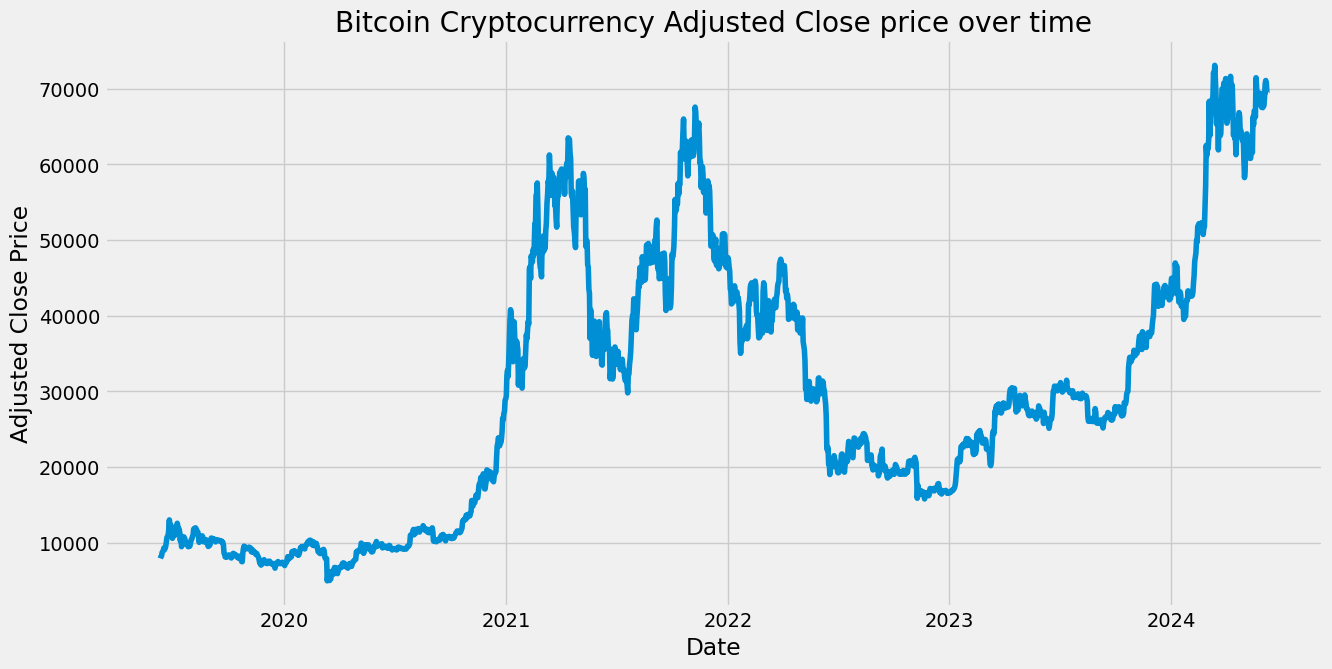

In [164]:
# Line plot of Adjusted Close price over Time
# Theme for plots
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14,7))
plt.plot(df.index, df['Adj Close'])
plt.title('Bitcoin Cryptocurrency Adjusted Close price over time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.grid(True)
plt.show()

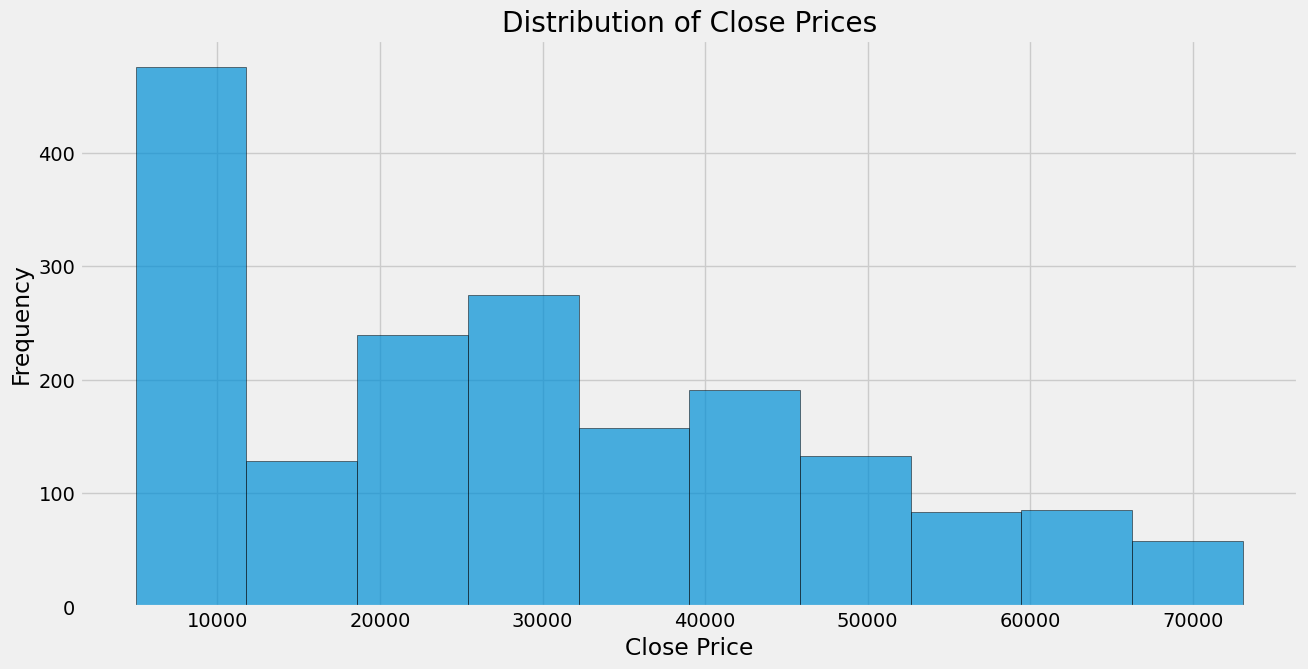

In [165]:
# Frequency plot of adjusted close price 
plt.figure(figsize=(14, 7))
plt.hist(df['Adj Close'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

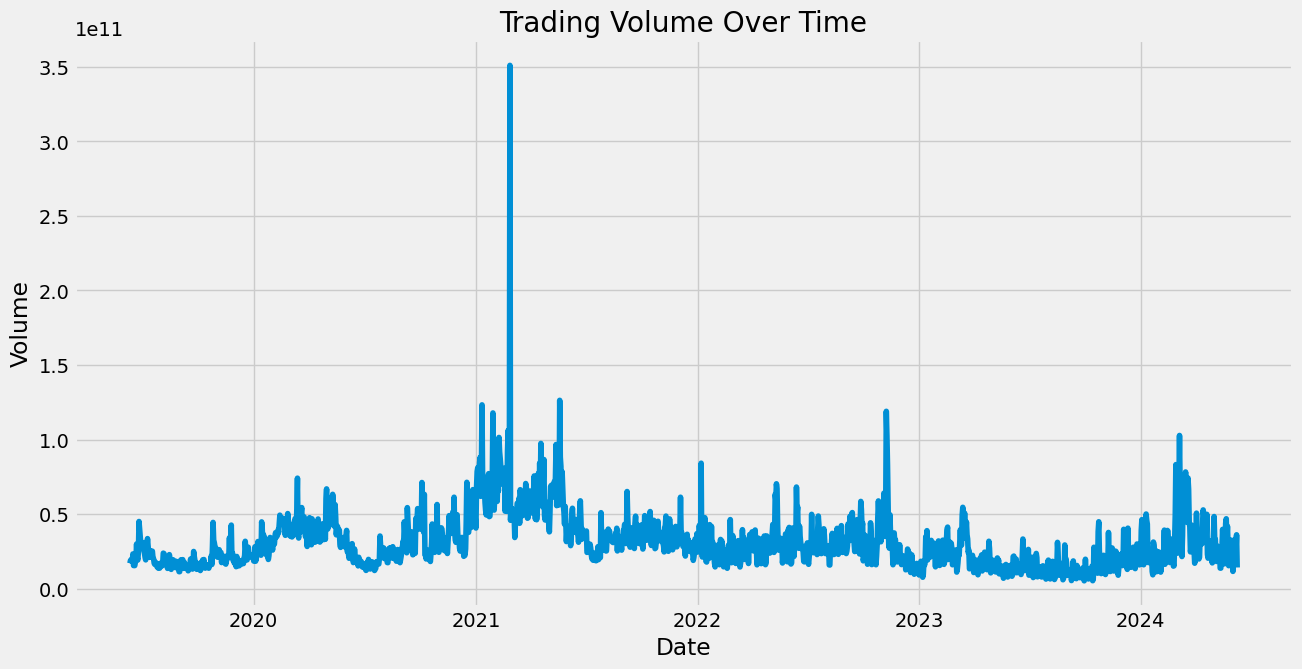

In [166]:
# Plotting Trading volume over time
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Volume'])
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

In [167]:
# Calculate percentage returns and log percentage returns
df['Pct_Returns'] = df['Adj Close'].pct_change()
df['Log_Pct_Returns'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))
df

,Open,High,Low,Close,Adj Close,Volume,Pct_Returns,Log_Pct_Returns
Date,,,,,,,,
2019-06-11,8004.243652,8026.394043,7772.803711,7927.714355,7927.714355,17107279932,NaN,NaN
2019-06-12,7925.434082,8196.648438,7862.359863,8145.857422,8145.857422,19034432883,0.027517,0.027145
2019-06-13,8145.545410,8311.567383,8087.061035,8230.923828,8230.923828,18669407147,0.010443,0.010389
2019-06-14,8230.898438,8710.636719,8183.393066,8693.833008,8693.833008,19831162906,0.056240,0.054716
2019-06-15,8689.746094,8859.127930,8618.395508,8838.375000,8838.375000,18371033226,0.016626,0.016489
...,...,...,...,...,...,...,...,...
2024-06-04,68804.570312,71047.406250,68564.640625,70567.765625,70567.765625,33149696545,0.025623,0.025300
2024-06-05,70568.351562,71735.414062,70390.710938,71082.820312,71082.820312,32810771409,0.007299,0.007272
2024-06-06,71082.843750,71625.734375,70119.125000,70757.164062,70757.164062,25223152007,-0.004581,-0.004592


## Technical indicators

In [168]:
# Moving Averages

# Simple Moving Averages
df['SMA_5'] = df['Adj Close'].rolling(window=5).mean()
df['SMA_10'] = df['Adj Close'].rolling(window=10).mean()
df['SMA_20'] = df['Adj Close'].rolling(window=20).mean()
df['SMA_50'] = df['Adj Close'].rolling(window=50).mean()

# Exponential Moving Average
df['EMA_50'] = df['Adj Close'].ewm(span=50,adjust=False).mean()

# Relative Strength Index (RSI)
window_length = 14
delta = df['Adj Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=window_length).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=window_length).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

# Moving Average Convergence Divergence (MACD)
df['MACD'] = df['Adj Close'].ewm(span=12, adjust=False).mean() - df['Adj Close'].ewm(span=26, adjust=False).mean()
df['MACD_signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
df['MACD_hist'] = df['MACD'] - df['MACD_signal']

# Bollinger Bands
df['BB_upper'] = df['SMA_20'] + 2*df['Adj Close'].rolling(window=20).std()
df['BB_lower'] = df['SMA_20'] - 2*df['Adj Close'].rolling(window=20).std()

# Stochastic Oscillator
df['14-high'] = df['High'].rolling(14).max()
df['14-low'] = df['Low'].rolling(14).min()
df['%K'] = (df['Adj Close'] - df['14-low']) * 100 / (df['14-high'] - df['14-low'])
df['%D'] = df['%K'].rolling(3).mean()

# Average True Range (ATR)
df['H-L'] = df['High'] - df['Low']
df['H-PC'] = np.abs(df['High'] - df['Adj Close'].shift(1))
df['L-PC'] = np.abs(df['Low'] - df['Adj Close'].shift(1))
df['TR'] = df[['H-L', 'H-PC', 'L-PC']].max(axis=1)
df['ATR'] = df['TR'].rolling(14).mean()

# Shift
df['Pct_Returns_1'] = df['Pct_Returns'].shift(1)
df['Log_Pct_Returns_1'] = df['Log_Pct_Returns'].shift(1)
df['Volume_1'] = df['Volume'].shift(1)
df['Open_1'] = df['Open'].shift(1)
df['High_1'] = df['High'].shift(1)
df['Low_1'] = df['Low'].shift(1)
df['SMA_5_1'] = df['SMA_5'].shift(1)
df['SMA_10_1'] = df['SMA_10'].shift(1)
df['SMA_20_1'] = df['SMA_20'].shift(1)
df['SMA_50_1'] = df['SMA_50'].shift(1)
df['EMA_50_1'] = df['EMA_50'].shift(1)
df['RSI_1'] = df['RSI'].shift(1)
df['MACD_1'] = df['MACD'].shift(1)
df['MACD_signal_1'] = df['MACD_signal'].shift(1)
df['MACD_hist_1'] = df['MACD_hist'].shift(1)
df['BB_upper_1'] = df['BB_upper'].shift(1)
df['BB_lower_1'] = df['BB_lower'].shift(1)
df['%K_1'] = df['%K'].shift(1)
df['%D_1'] = df['%D'].shift(1)
df['ATR_1'] = df['ATR'].shift(1)

df

,Open,High,Low,Close,Adj Close,Volume,Pct_Returns,Log_Pct_Returns,SMA_5,SMA_10,...,EMA_50_1,RSI_1,MACD_1,MACD_signal_1,MACD_hist_1,BB_upper_1,BB_lower_1,%K_1,%D_1,ATR_1
Date,,,,,,,,,,,,,,,,,,,,,
2019-06-11,8004.243652,8026.394043,7772.803711,7927.714355,7927.714355,17107279932,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-12,7925.434082,8196.648438,7862.359863,8145.857422,8145.857422,19034432883,0.027517,0.027145,NaN,NaN,...,7927.714355,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
2019-06-13,8145.545410,8311.567383,8087.061035,8230.923828,8230.923828,18669407147,0.010443,0.010389,NaN,NaN,...,7936.268986,NaN,17.401726,3.480345,13.921381,NaN,NaN,NaN,NaN,NaN
2019-06-14,8230.898438,8710.636719,8183.393066,8693.833008,8693.833008,19831162906,0.056240,0.054716,NaN,NaN,...,7947.824077,NaN,37.623171,10.308910,27.314261,NaN,NaN,NaN,NaN,NaN
2019-06-15,8689.746094,8859.127930,8618.395508,8838.375000,8838.375000,18371033226,0.016626,0.016489,8367.340723,NaN,...,7977.079330,NaN,89.964657,26.240060,63.724597,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-04,68804.570312,71047.406250,68564.640625,70567.765625,70567.765625,33149696545,0.025623,0.025300,68464.500000,68447.445312,...,65981.697008,38.271960,930.045617,1082.967250,-152.921634,70959.406182,65251.141865,43.793268,33.887525,2029.267857
2024-06-05,70568.351562,71735.414062,70390.710938,71082.820312,71082.820312,32810771409,0.007299,0.007272,69182.781250,68703.917969,...,66161.542836,51.839587,1065.854563,1079.544713,-13.690150,71238.673677,65401.901713,89.774109,53.995426,2009.798549
2024-06-06,71082.843750,71625.734375,70119.125000,70757.164062,70757.164062,25223152007,-0.004581,-0.004592,69792.826563,68840.178906,...,66354.534109,58.735150,1201.198077,1103.875386,97.322691,71397.592773,65828.106445,87.866534,73.811303,1988.277344


In [169]:
# Finding correlation of each column
df.corr()

,Open,High,Low,Close,Adj Close,Volume,Pct_Returns,Log_Pct_Returns,SMA_5,SMA_10,...,EMA_50_1,RSI_1,MACD_1,MACD_signal_1,MACD_hist_1,BB_upper_1,BB_lower_1,%K_1,%D_1,ATR_1
Open,1.000000,0.999069,0.998434,0.997836,0.997836,0.273876,-0.031214,-0.029410,0.998753,0.995671,...,0.970783,0.094568,0.291583,0.310658,-0.014941,0.984022,0.973478,0.113682,0.123799,0.820449
High,0.999069,1.000000,0.998171,0.999066,0.999066,0.286643,-0.002739,-0.001989,0.998433,0.995284,...,0.970024,0.094781,0.291627,0.311562,-0.017933,0.984527,0.971735,0.113169,0.123809,0.825875
Low,0.998434,0.998171,1.000000,0.998866,0.998866,0.250655,0.000839,0.003186,0.997505,0.993842,...,0.968684,0.097426,0.292394,0.310353,-0.010913,0.980493,0.972844,0.117113,0.126488,0.810259
Close,0.997836,0.999066,0.998866,1.000000,1.000000,0.270762,0.024269,0.025439,0.997570,0.993974,...,0.968243,0.096697,0.293255,0.312418,-0.014954,0.982040,0.970896,0.114764,0.125358,0.818840
Adj Close,0.997836,0.999066,0.998866,1.000000,1.000000,0.270762,0.024269,0.025439,0.997570,0.993974,...,0.968243,0.096697,0.293255,0.312418,-0.014954,0.982040,0.970896,0.114764,0.125358,0.818840
Volume,0.273876,0.286643,0.250655,0.270762,0.270762,1.000000,-0.009225,-0.024356,0.273094,0.270708,...,0.228992,0.114813,0.231310,0.254247,-0.039049,0.297095,0.204639,0.107821,0.127323,0.455448
Pct_Returns,-0.031214,-0.002739,0.000839,0.024269,0.024269,-0.009225,1.000000,0.997500,-0.017387,-0.022986,...,-0.036832,0.034755,0.019627,0.020813,-0.000668,-0.023028,-0.032140,0.019281,0.023529,-0.015014
Log_Pct_Returns,-0.029410,-0.001989,0.003186,0.025439,0.025439,-0.024356,0.997500,1.000000,-0.015926,-0.021601,...,-0.035437,0.037365,0.020769,0.021255,0.001976,-0.022860,-0.030574,0.022823,0.026589,-0.017973
SMA_5,0.998753,0.998433,0.997505,0.997570,0.997570,0.273094,-0.017387,-0.015926,1.000000,0.998199,...,0.974380,0.077762,0.283699,0.307810,-0.033876,0.987024,0.977253,0.088677,0.108182,0.824030
SMA_10,0.995671,0.995284,0.993842,0.993974,0.993974,0.270708,-0.022986,-0.021601,0.998199,1.000000,...,0.980611,0.043040,0.254893,0.291307,-0.081824,0.991179,0.983589,0.050712,0.068420,0.831181


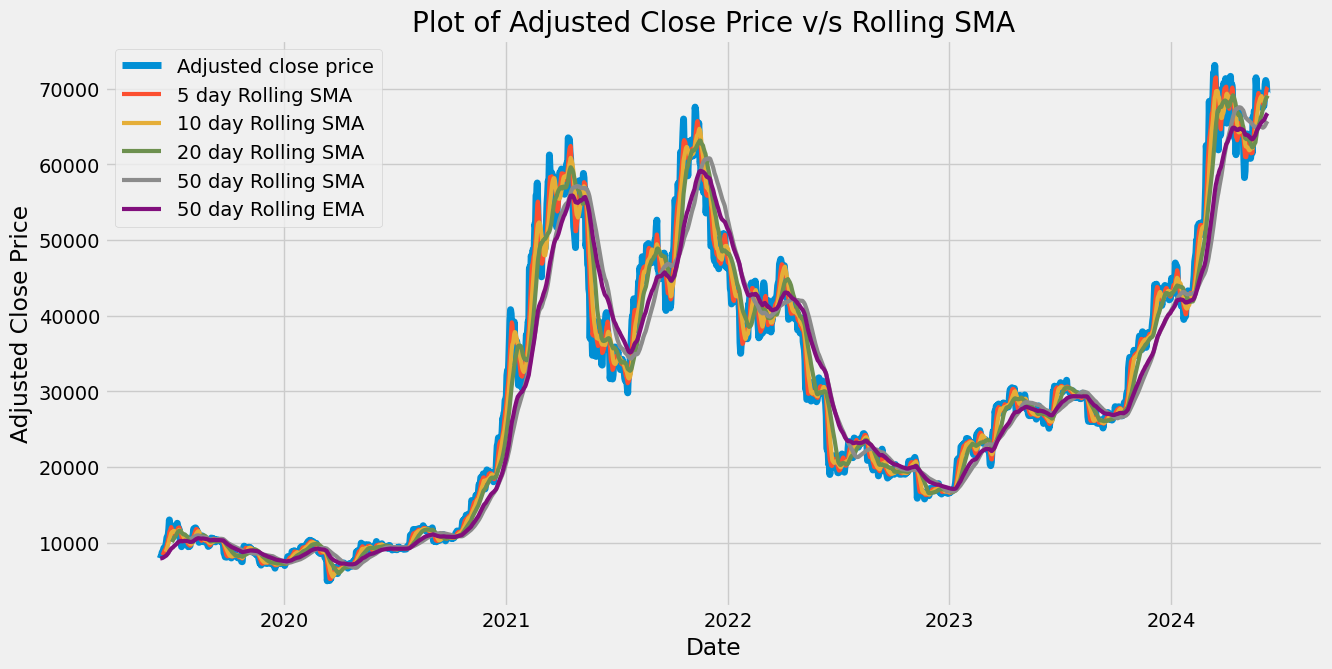

In [170]:
plt.figure(figsize = (14,7))

#Plotting Adjusted Close Price and Rolling SMA lines
plt.plot(df['Adj Close'],label='Adjusted close price',linewidth=5)
plt.plot(df['SMA_5'],label='5 day Rolling SMA',linewidth=3)
plt.plot(df['SMA_10'],label='10 day Rolling SMA',linewidth=3)
plt.plot(df['SMA_20'],label='20 day Rolling SMA',linewidth=3)
plt.plot(df['SMA_50'],label='50 day Rolling SMA',linewidth=3)
plt.plot(df['EMA_50'],label='50 day Rolling EMA',linewidth=3)
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Plot of Adjusted Close Price v/s Rolling SMA')
plt.legend()

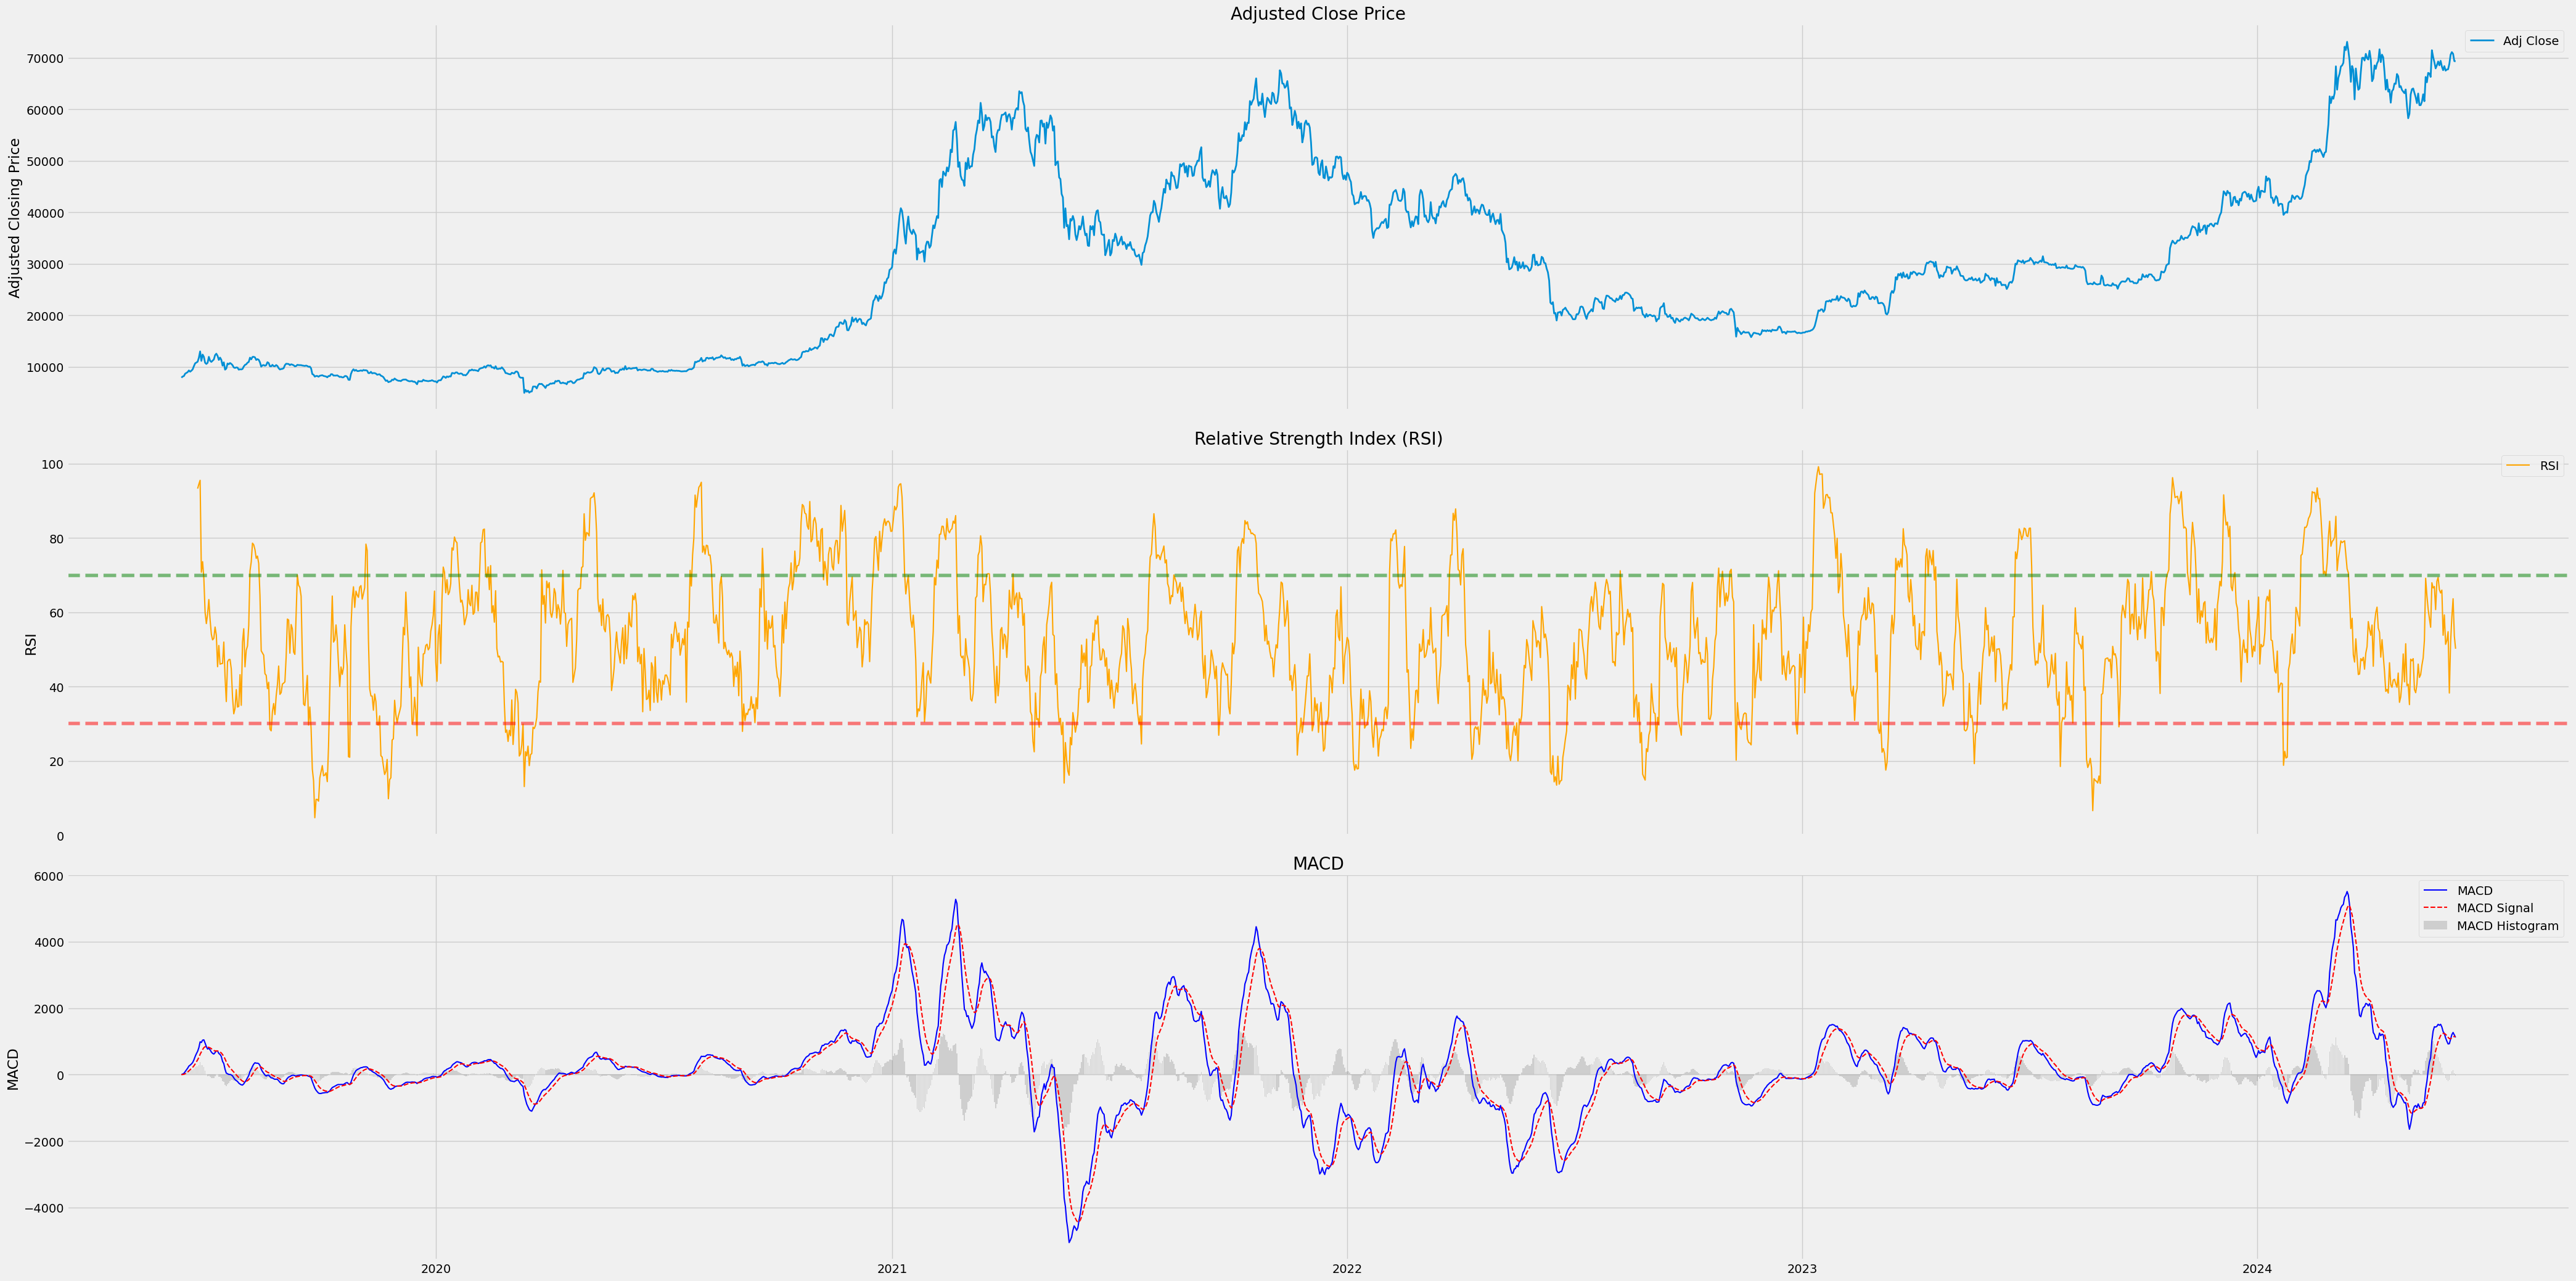

In [171]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(42, 21), sharex=True)

# Plotting Adjusted close price on the first subplot
ax1.plot(df['Adj Close'], label='Adj Close', linewidth=2)
ax1.set_title('Adjusted Close Price')
ax1.set_ylabel('Adjusted Closing Price')
ax1.legend()

# Plotting RSI on the second subplot
ax2.plot(df['RSI'], label='RSI', color='orange', linewidth=1.5)
ax2.set_title('Relative Strength Index (RSI)')
ax2.set_ylabel('RSI')
ax2.axhline(30, linestyle='--', alpha=0.5, color='red')
ax2.axhline(70, linestyle='--', alpha=0.5, color='green')
ax2.legend()

# Plotting MACD on the third subplot
ax3.plot(df['MACD'], label='MACD', color='blue', linewidth=1.5)
ax3.plot(df['MACD_signal'], label='MACD Signal', color='red', linestyle='--', linewidth=1.5)
ax3.bar(df.index, df['MACD_hist'], label='MACD Histogram', color='grey', alpha=0.3)
ax3.set_title('MACD')
ax3.set_ylabel('MACD')
ax3.legend()

plt.tight_layout()
plt.show()

## Linear Regression

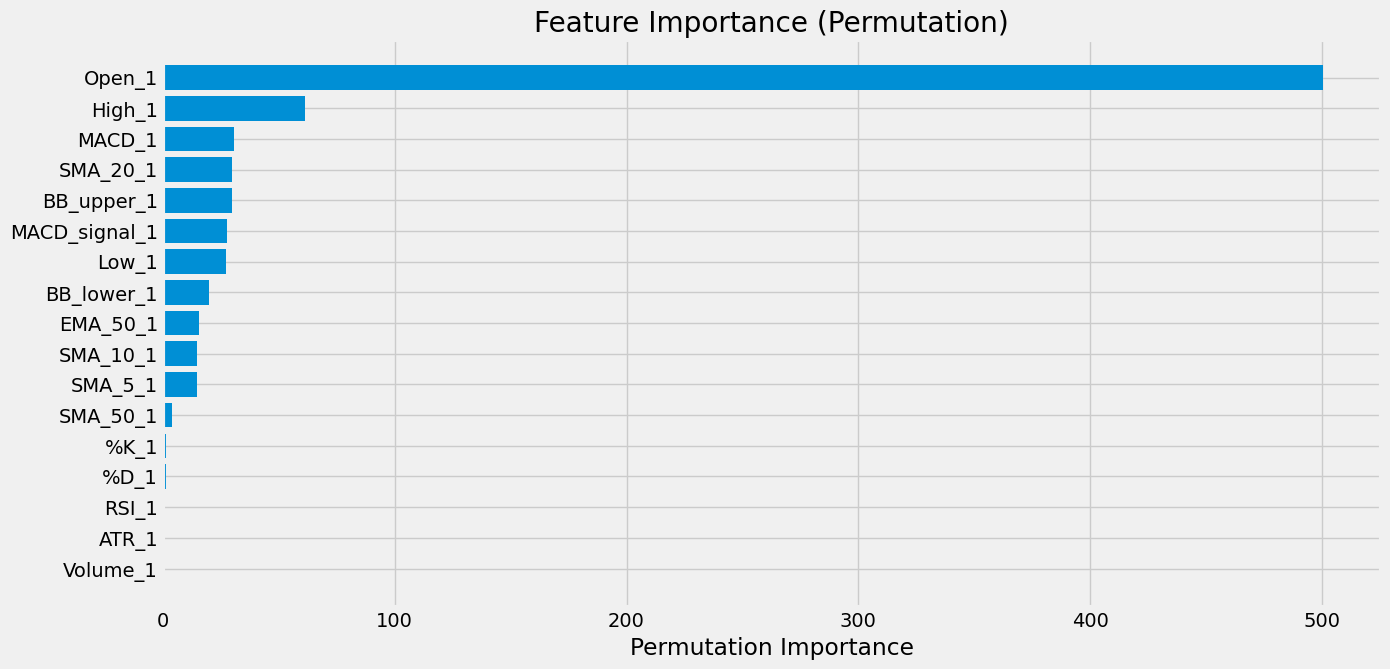

In [172]:
# Model training
features = ['SMA_5_1','SMA_10_1','SMA_20_1','SMA_50_1', 'EMA_50_1', 'RSI_1',
       'MACD_1', 'MACD_signal_1','BB_upper_1', 'BB_lower_1', '%K_1', '%D_1', 
       'ATR_1','Volume_1','Open_1', 'High_1','Low_1']
X = df[features].dropna()
y = df['Log_Pct_Returns_1'][X.index]

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Converting scaled features into dataframe
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Initialize linear regression model
model = LinearRegression()

model.fit(X_scaled, y)

# Calculate permutation importance
perm_importance = permutation_importance(model, X_scaled, y, n_repeats=30, random_state=42)

# Get feature names
feature_names = X.columns

# Sort feature importance
sorted_idx = perm_importance.importances_mean.argsort()

# Plot permutation importance
plt.figure(figsize=(14, 7))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance (Permutation)')
plt.show()


In [173]:
# Model training
features = ['SMA_5_1','SMA_10_1','SMA_20_1','SMA_50_1', 'EMA_50_1', 'RSI_1',
       'MACD_1', 'MACD_signal_1','BB_upper_1', 'BB_lower_1', '%K_1', '%D_1', 
       'ATR_1','Volume_1','Open_1', 'High_1','Low_1']
X = df[features].dropna()
y = df['Log_Pct_Returns_1'][X.index]

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Converting scaled features into dataframe
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Initialize linear regression model
model = LinearRegression()

# Time series split for cross-validation
tscv = TimeSeriesSplit(n_splits=10)

# Metrics list to store scores for each fold
mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []

# Perform cross-validation
for train_index, test_index in tscv.split(X_scaled):
    X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse_scores.append(mean_squared_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Calulate mean and standard deviation of the scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Print Results
print("TimeSeriesSplit Cross-Validation MSE:", mean_mse)
print("TimeSeriesSplit Cross-Validation MSE Std Dev:", std_mse)
print("TimeSeriesSplit Cross-Validation RMSE:", mean_rmse)
print("TimeSeriesSplit Cross-Validation RMSE Std Dev:", std_rmse)
print("TimeSeriesSplit Cross-Validation MAE:", mean_mae)
print("TimeSeriesSplit Cross-Validation MAE Std Dev:", std_mae)
print("TimeSeriesSplit Cross-Validation R2:", mean_r2)
print("TimeSeriesSplit Cross-Validation R2 Std Dev:", std_r2)


TimeSeriesSplit Cross-Validation MSE: 0.0027708835499860316
TimeSeriesSplit Cross-Validation MSE Std Dev: 0.007500642696429663
TimeSeriesSplit Cross-Validation RMSE: 0.03018797540705122
TimeSeriesSplit Cross-Validation RMSE Std Dev: 0.0431227282394018
TimeSeriesSplit Cross-Validation MAE: 0.021386371801847288
TimeSeriesSplit Cross-Validation MAE Std Dev: 0.03118539355146068
TimeSeriesSplit Cross-Validation R2: -0.6384982784193475
TimeSeriesSplit Cross-Validation R2 Std Dev: 4.072224055693212


## Lasso Regression

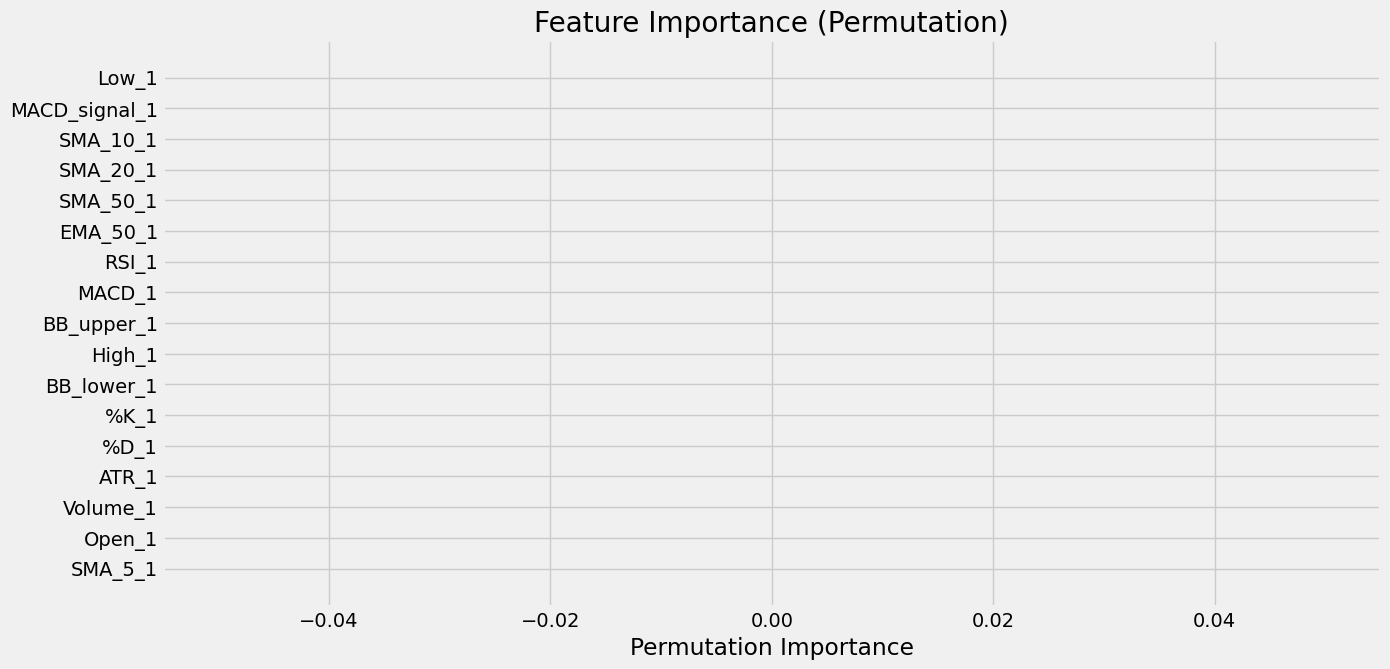

In [174]:
# Model training
features = ['SMA_5_1','SMA_10_1','SMA_20_1','SMA_50_1', 'EMA_50_1', 'RSI_1',
       'MACD_1', 'MACD_signal_1','BB_upper_1', 'BB_lower_1', '%K_1', '%D_1', 
       'ATR_1','Volume_1','Open_1', 'High_1','Low_1']
X = df[features].dropna()
y = df['Log_Pct_Returns_1'][X.index]

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Converting scaled features into dataframe
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Initialize Lasso regression model
model = Lasso()

model.fit(X_scaled, y)

# Calculate permutation importance
perm_importance = permutation_importance(model, X_scaled, y, n_repeats=30, random_state=42)

# Get feature names
feature_names = X.columns

# Sort feature importance
sorted_idx = perm_importance.importances_mean.argsort()

# Plot permutation importance
plt.figure(figsize=(14, 7))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance (Permutation)')
plt.show()


In [175]:
# Model training
features = ['SMA_5_1','SMA_10_1','SMA_20_1','SMA_50_1', 'EMA_50_1', 'RSI_1',
       'MACD_1', 'MACD_signal_1','BB_upper_1', 'BB_lower_1', '%K_1', '%D_1', 
       'ATR_1','Volume_1','Open_1', 'High_1','Low_1']
X = df[features].dropna()
y = df['Log_Pct_Returns_1'][X.index]

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Converting scaled features into dataframe
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Initialize lasso regression model
model = Lasso()

# Time series split for cross-validation
tscv = TimeSeriesSplit(n_splits=10)

# Metrics list to store scores for each fold
mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []

# Perform cross-validation
for train_index, test_index in tscv.split(X_scaled):
    X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse_scores.append(mean_squared_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Calulate mean and standard deviation of the scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Print Results
print("TimeSeriesSplit Cross-Validation MSE:", mean_mse)
print("TimeSeriesSplit Cross-Validation MSE Std Dev:", std_mse)
print("TimeSeriesSplit Cross-Validation RMSE:", mean_rmse)
print("TimeSeriesSplit Cross-Validation RMSE Std Dev:", std_rmse)
print("TimeSeriesSplit Cross-Validation MAE:", mean_mae)
print("TimeSeriesSplit Cross-Validation MAE Std Dev:", std_mae)
print("TimeSeriesSplit Cross-Validation R2:", mean_r2)
print("TimeSeriesSplit Cross-Validation R2 Std Dev:", std_r2)


TimeSeriesSplit Cross-Validation MSE: 0.001225340272083999
TimeSeriesSplit Cross-Validation MSE Std Dev: 0.0006863995656989836
TimeSeriesSplit Cross-Validation RMSE: 0.03369519754755871
TimeSeriesSplit Cross-Validation RMSE Std Dev: 0.009485459098799234
TimeSeriesSplit Cross-Validation MAE: 0.02290721729376746
TimeSeriesSplit Cross-Validation MAE Std Dev: 0.006402712967275238
TimeSeriesSplit Cross-Validation R2: -0.01129151094648071
TimeSeriesSplit Cross-Validation R2 Std Dev: 0.01121583834097712


## Ridge

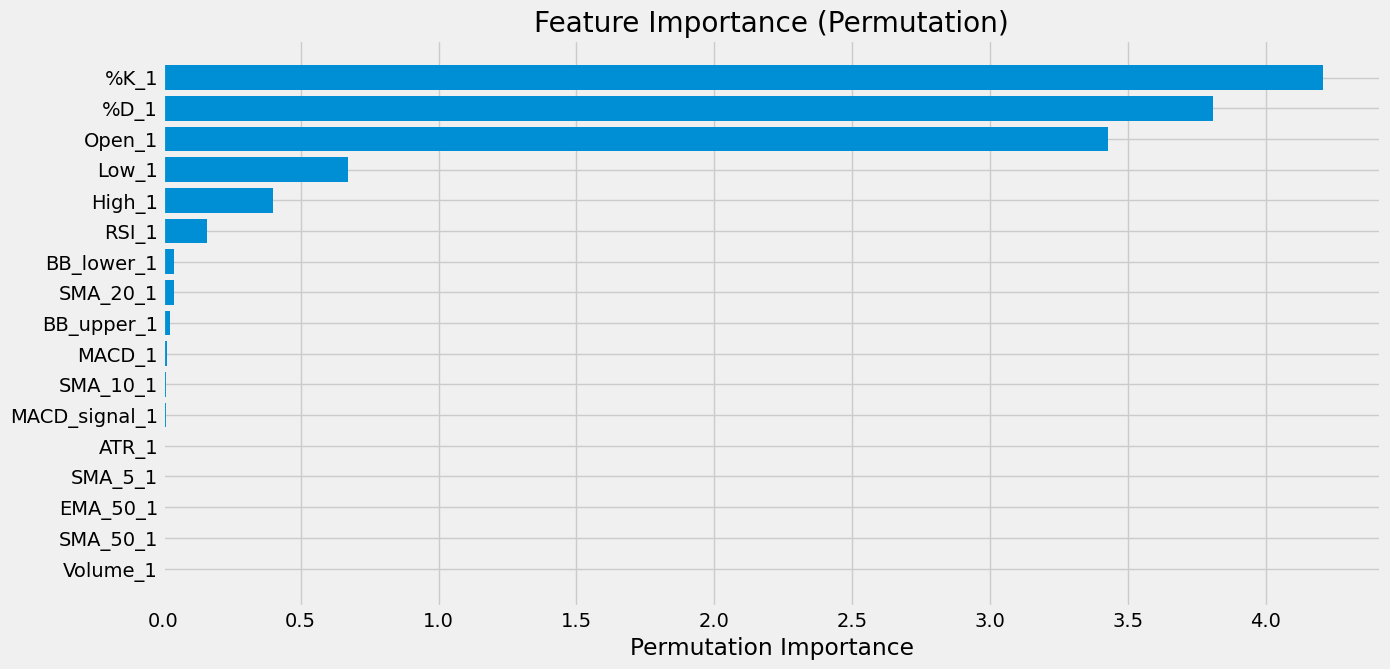

In [176]:
# Model training
features = ['SMA_5_1','SMA_10_1','SMA_20_1','SMA_50_1', 'EMA_50_1', 'RSI_1',
       'MACD_1', 'MACD_signal_1','BB_upper_1', 'BB_lower_1', '%K_1', '%D_1', 
       'ATR_1','Volume_1','Open_1', 'High_1','Low_1']
X = df[features].dropna()
y = df['Log_Pct_Returns_1'][X.index]

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Converting scaled features into dataframe
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Initialize Ridge regression model
model = Ridge()

model.fit(X_scaled, y)

# Calculate permutation importance
perm_importance = permutation_importance(model, X_scaled, y, n_repeats=30, random_state=42)

# Get feature names
feature_names = X.columns

# Sort feature importance
sorted_idx = perm_importance.importances_mean.argsort()

# Plot permutation importance
plt.figure(figsize=(14, 7))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance (Permutation)')
plt.show()


In [177]:
# Model training
features = ['SMA_10_1','SMA_20_1','SMA_50_1', 'EMA_50_1', 'RSI_1',
       'MACD_1', 'MACD_signal_1','BB_upper_1', 'BB_lower_1', '%K_1', '%D_1', 
       'ATR_1','Open_1', 'High_1','Low_1']
X = df[features].dropna()
y = df['Log_Pct_Returns_1'][X.index]

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Converting scaled features into dataframe
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Initialize Ridge regression model
model = Ridge()

# Time series split for cross-validation
tscv = TimeSeriesSplit(n_splits=10)

# Metrics list to store scores for each fold
mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []

# Perform cross-validation
for train_index, test_index in tscv.split(X_scaled):
    X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse_scores.append(mean_squared_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Calulate mean and standard deviation of the scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Print Results
print("TimeSeriesSplit Cross-Validation MSE:", mean_mse)
print("TimeSeriesSplit Cross-Validation MSE Std Dev:", std_mse)
print("TimeSeriesSplit Cross-Validation RMSE:", mean_rmse)
print("TimeSeriesSplit Cross-Validation RMSE Std Dev:", std_rmse)
print("TimeSeriesSplit Cross-Validation MAE:", mean_mae)
print("TimeSeriesSplit Cross-Validation MAE Std Dev:", std_mae)
print("TimeSeriesSplit Cross-Validation R2:", mean_r2)
print("TimeSeriesSplit Cross-Validation R2 Std Dev:", std_r2)


TimeSeriesSplit Cross-Validation MSE: 0.0006877589327899624
TimeSeriesSplit Cross-Validation MSE Std Dev: 0.0005758247272000276
TimeSeriesSplit Cross-Validation RMSE: 0.02437100615950165
TimeSeriesSplit Cross-Validation RMSE Std Dev: 0.009685710689644569
TimeSeriesSplit Cross-Validation MAE: 0.016510237062643797
TimeSeriesSplit Cross-Validation MAE Std Dev: 0.004985627830492678
TimeSeriesSplit Cross-Validation R2: 0.4787223248758946
TimeSeriesSplit Cross-Validation R2 Std Dev: 0.15573152413824323


## Elastic Net

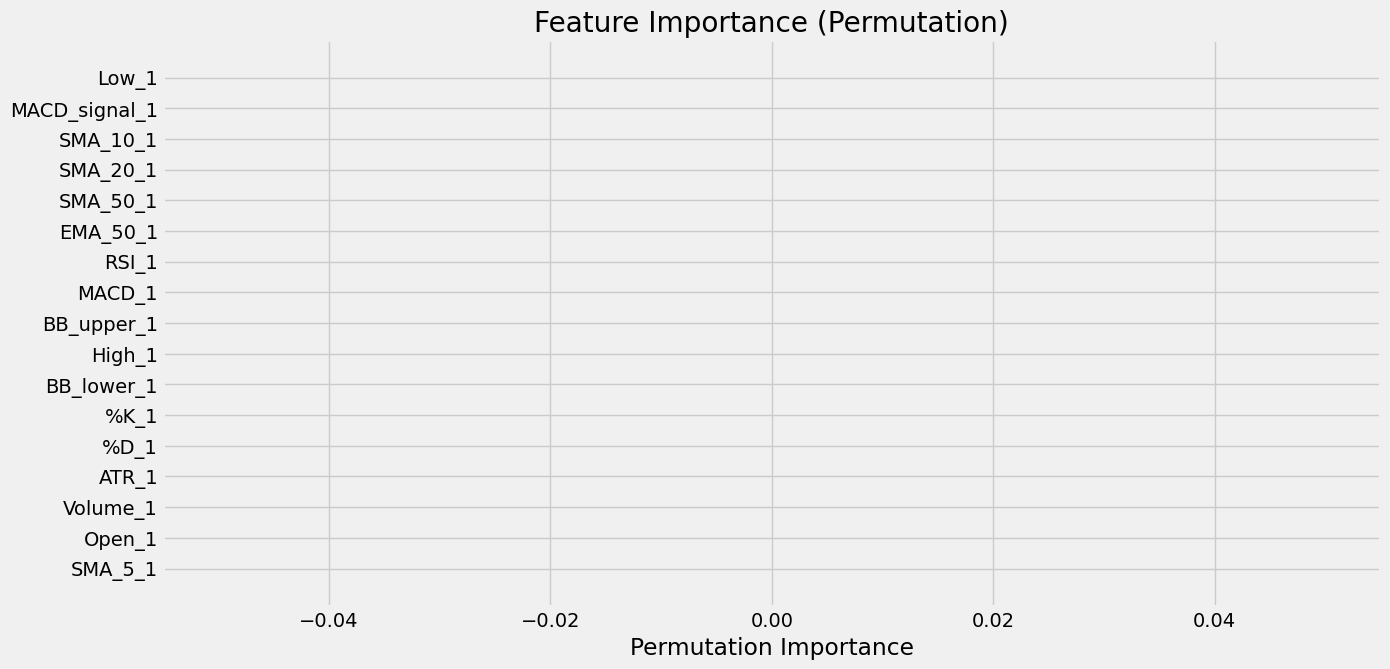

In [178]:
# Model training
features = ['SMA_5_1','SMA_10_1','SMA_20_1','SMA_50_1', 'EMA_50_1', 'RSI_1',
       'MACD_1', 'MACD_signal_1','BB_upper_1', 'BB_lower_1', '%K_1', '%D_1', 
       'ATR_1','Volume_1','Open_1', 'High_1','Low_1']
X = df[features].dropna()
y = df['Log_Pct_Returns_1'][X.index]

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Converting scaled features into dataframe
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Initialize Elastic Net model
model = ElasticNet()

model.fit(X_scaled, y)

# Calculate permutation importance
perm_importance = permutation_importance(model, X_scaled, y, n_repeats=30, random_state=42)

# Get feature names
feature_names = X.columns

# Sort feature importance
sorted_idx = perm_importance.importances_mean.argsort()

# Plot permutation importance
plt.figure(figsize=(14, 7))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance (Permutation)')
plt.show()


In [179]:
# Model training
features = ['SMA_5_1','SMA_10_1','SMA_20_1','SMA_50_1', 'EMA_50_1', 'RSI_1',
       'MACD_1', 'MACD_signal_1','BB_upper_1', 'BB_lower_1', '%K_1', '%D_1', 
       'ATR_1','Volume_1','Open_1', 'High_1','Low_1']
X = df[features].dropna()
y = df['Log_Pct_Returns_1'][X.index]

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Converting scaled features into dataframe
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Initialize Elastic Net model
model = ElasticNet()

# Time series split for cross-validation
tscv = TimeSeriesSplit(n_splits=10)

# Metrics list to store scores for each fold
mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []

# Perform cross-validation
for train_index, test_index in tscv.split(X_scaled):
    X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse_scores.append(mean_squared_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Calulate mean and standard deviation of the scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Print Results
print("TimeSeriesSplit Cross-Validation MSE:", mean_mse)
print("TimeSeriesSplit Cross-Validation MSE Std Dev:", std_mse)
print("TimeSeriesSplit Cross-Validation RMSE:", mean_rmse)
print("TimeSeriesSplit Cross-Validation RMSE Std Dev:", std_rmse)
print("TimeSeriesSplit Cross-Validation MAE:", mean_mae)
print("TimeSeriesSplit Cross-Validation MAE Std Dev:", std_mae)
print("TimeSeriesSplit Cross-Validation R2:", mean_r2)
print("TimeSeriesSplit Cross-Validation R2 Std Dev:", std_r2)


TimeSeriesSplit Cross-Validation MSE: 0.001225340272083999
TimeSeriesSplit Cross-Validation MSE Std Dev: 0.0006863995656989836
TimeSeriesSplit Cross-Validation RMSE: 0.03369519754755871
TimeSeriesSplit Cross-Validation RMSE Std Dev: 0.009485459098799234
TimeSeriesSplit Cross-Validation MAE: 0.02290721729376746
TimeSeriesSplit Cross-Validation MAE Std Dev: 0.006402712967275238
TimeSeriesSplit Cross-Validation R2: -0.01129151094648071
TimeSeriesSplit Cross-Validation R2 Std Dev: 0.01121583834097712


## Random Forest Regression

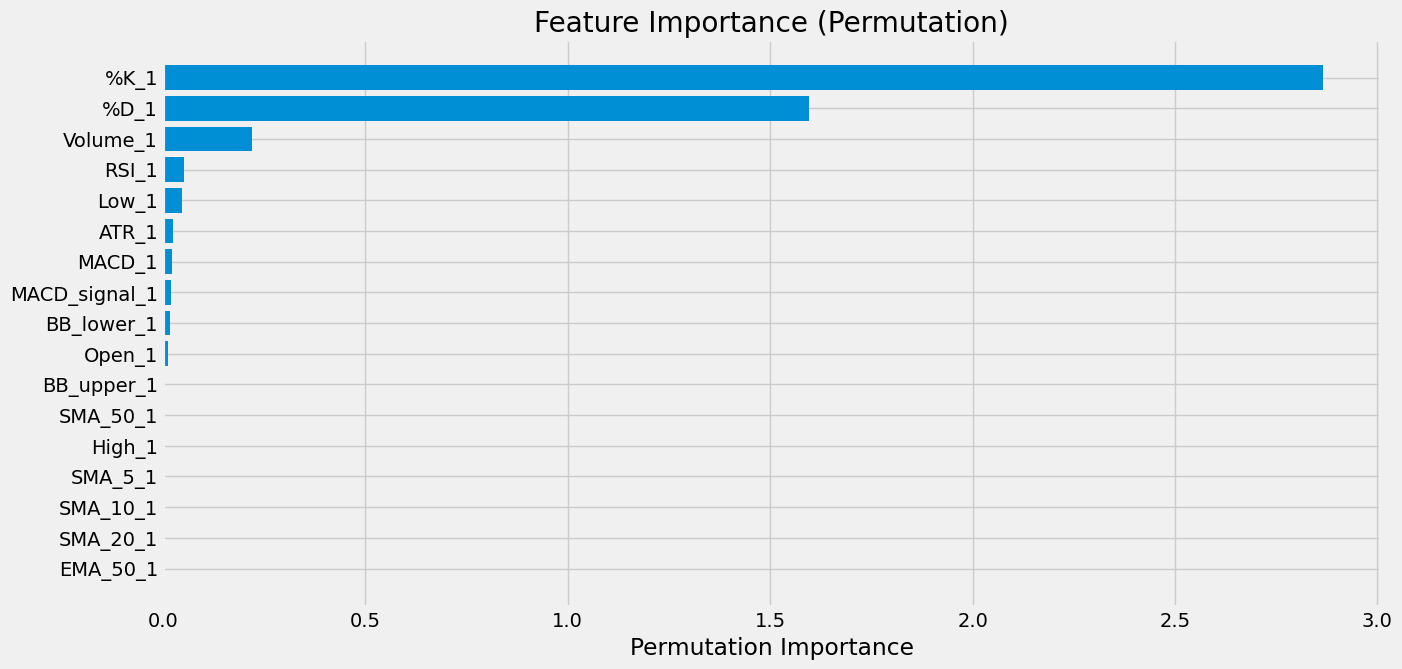

In [180]:
# Model training
features = ['SMA_5_1','SMA_10_1','SMA_20_1','SMA_50_1', 'EMA_50_1', 'RSI_1',
       'MACD_1', 'MACD_signal_1','BB_upper_1', 'BB_lower_1', '%K_1', '%D_1', 
       'ATR_1','Volume_1','Open_1', 'High_1','Low_1']
X = df[features].dropna()
y = df['Log_Pct_Returns_1'][X.index]

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Converting scaled features into dataframe
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Initialize Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_scaled, y)

# Calculate permutation importance
perm_importance = permutation_importance(model, X_scaled, y, n_repeats=30, random_state=42)

# Get feature names
feature_names = X.columns

# Sort feature importance
sorted_idx = perm_importance.importances_mean.argsort()

# Plot permutation importance
plt.figure(figsize=(14, 7))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance (Permutation)')
plt.show()


In [181]:
# Model training
features = ['SMA_5_1','EMA_50_1', 'RSI_1',
       'MACD_1', 'MACD_signal_1','BB_upper_1', 'BB_lower_1', '%K_1', '%D_1', 
       'ATR_1','Volume_1','Open_1', 'High_1','Low_1']
X = df[features].dropna()
y = df['Log_Pct_Returns_1'][X.index]

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Converting scaled features into dataframe
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Initialize Random Forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Time series split for cross-validation
tscv = TimeSeriesSplit(n_splits=10)

# Metrics list to store scores for each fold
mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []

# Perform cross-validation
for train_index, test_index in tscv.split(X_scaled):
    X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse_scores.append(mean_squared_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Calulate mean and standard deviation of the scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Print Results
print("TimeSeriesSplit Cross-Validation MSE:", mean_mse)
print("TimeSeriesSplit Cross-Validation MSE Std Dev:", std_mse)
print("TimeSeriesSplit Cross-Validation RMSE:", mean_rmse)
print("TimeSeriesSplit Cross-Validation RMSE Std Dev:", std_rmse)
print("TimeSeriesSplit Cross-Validation MAE:", mean_mae)
print("TimeSeriesSplit Cross-Validation MAE Std Dev:", std_mae)
print("TimeSeriesSplit Cross-Validation R2:", mean_r2)
print("TimeSeriesSplit Cross-Validation R2 Std Dev:", std_r2)


TimeSeriesSplit Cross-Validation MSE: 0.0007156445599837376
TimeSeriesSplit Cross-Validation MSE Std Dev: 0.0006417568345998482
TimeSeriesSplit Cross-Validation RMSE: 0.02471863211389627
TimeSeriesSplit Cross-Validation RMSE Std Dev: 0.010229065763870794
TimeSeriesSplit Cross-Validation MAE: 0.017212601451831254
TimeSeriesSplit Cross-Validation MAE Std Dev: 0.0065744437963589225
TimeSeriesSplit Cross-Validation R2: 0.4638568069132548
TimeSeriesSplit Cross-Validation R2 Std Dev: 0.16168916269911274


## Gradient Boost Regression

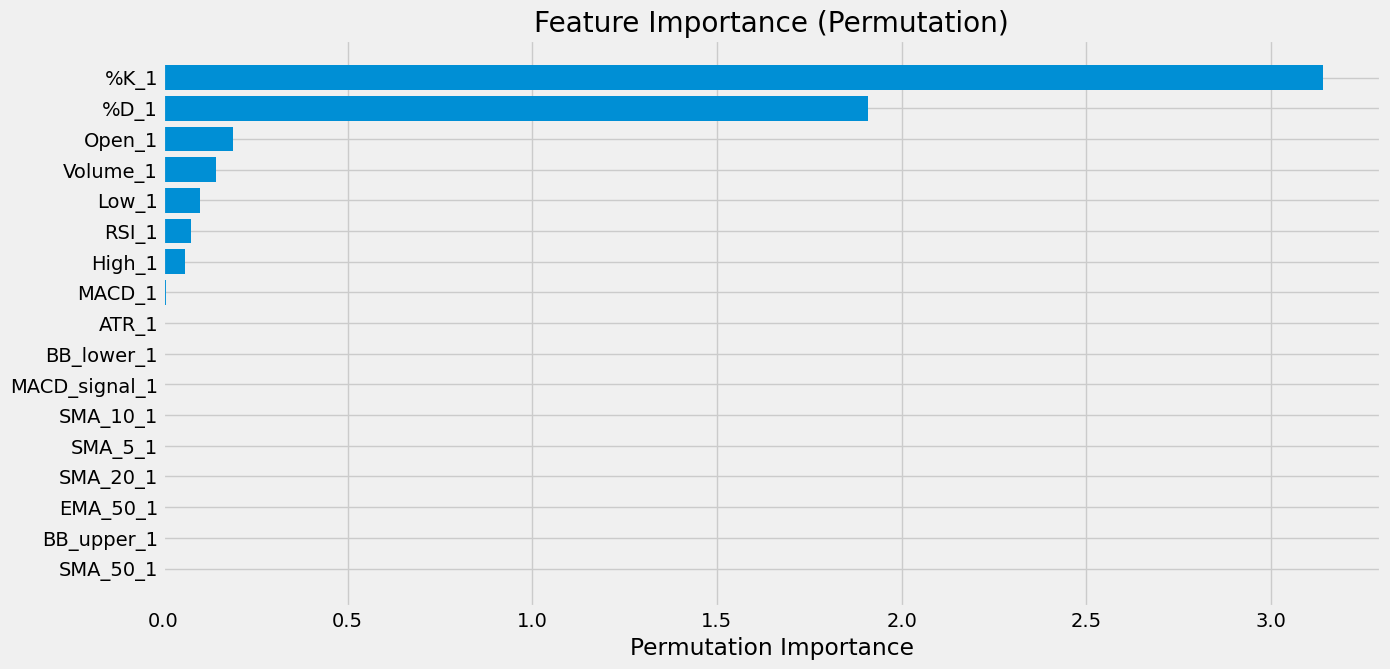

In [182]:
# Model training
features = ['SMA_5_1','SMA_10_1','SMA_20_1','SMA_50_1', 'EMA_50_1', 'RSI_1',
       'MACD_1', 'MACD_signal_1','BB_upper_1', 'BB_lower_1', '%K_1', '%D_1', 
       'ATR_1','Volume_1','Open_1', 'High_1','Low_1']
X = df[features].dropna()
y = df['Log_Pct_Returns_1'][X.index]

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Converting scaled features into dataframe
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Initialize Gradient Boost Regression model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

model.fit(X_scaled, y)

# Calculate permutation importance
perm_importance = permutation_importance(model, X_scaled, y, n_repeats=30, random_state=42)

# Get feature names
feature_names = X.columns

# Sort feature importance
sorted_idx = perm_importance.importances_mean.argsort()

# Plot permutation importance
plt.figure(figsize=(14, 7))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance (Permutation)')
plt.show()


In [183]:
# Model training
features = ['SMA_5_1','SMA_10_1','SMA_20_1','SMA_50_1', 'EMA_50_1', 'RSI_1',
       'MACD_1', 'MACD_signal_1','BB_upper_1', 'BB_lower_1', '%K_1', '%D_1', 
       'ATR_1','Volume_1','Open_1', 'High_1','Low_1']
X = df[features].dropna()
y = df['Log_Pct_Returns_1'][X.index]

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Converting scaled features into dataframe
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Initialize Gradient Boost Regression model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Time series split for cross-validation
tscv = TimeSeriesSplit(n_splits=10)

# Metrics list to store scores for each fold
mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []

# Perform cross-validation
for train_index, test_index in tscv.split(X_scaled):
    X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse_scores.append(mean_squared_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Calulate mean and standard deviation of the scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Print Results
print("TimeSeriesSplit Cross-Validation MSE:", mean_mse)
print("TimeSeriesSplit Cross-Validation MSE Std Dev:", std_mse)
print("TimeSeriesSplit Cross-Validation RMSE:", mean_rmse)
print("TimeSeriesSplit Cross-Validation RMSE Std Dev:", std_rmse)
print("TimeSeriesSplit Cross-Validation MAE:", mean_mae)
print("TimeSeriesSplit Cross-Validation MAE Std Dev:", std_mae)
print("TimeSeriesSplit Cross-Validation R2:", mean_r2)
print("TimeSeriesSplit Cross-Validation R2 Std Dev:", std_r2)


TimeSeriesSplit Cross-Validation MSE: 0.0007635534887804112
TimeSeriesSplit Cross-Validation MSE Std Dev: 0.0006843409535541151
TimeSeriesSplit Cross-Validation RMSE: 0.025429969733602547
TimeSeriesSplit Cross-Validation RMSE Std Dev: 0.010810648830133633
TimeSeriesSplit Cross-Validation MAE: 0.017579584894432437
TimeSeriesSplit Cross-Validation MAE Std Dev: 0.00670731173365723
TimeSeriesSplit Cross-Validation R2: 0.4253253041283499
TimeSeriesSplit Cross-Validation R2 Std Dev: 0.23864423503888518


## Support Vector Regression

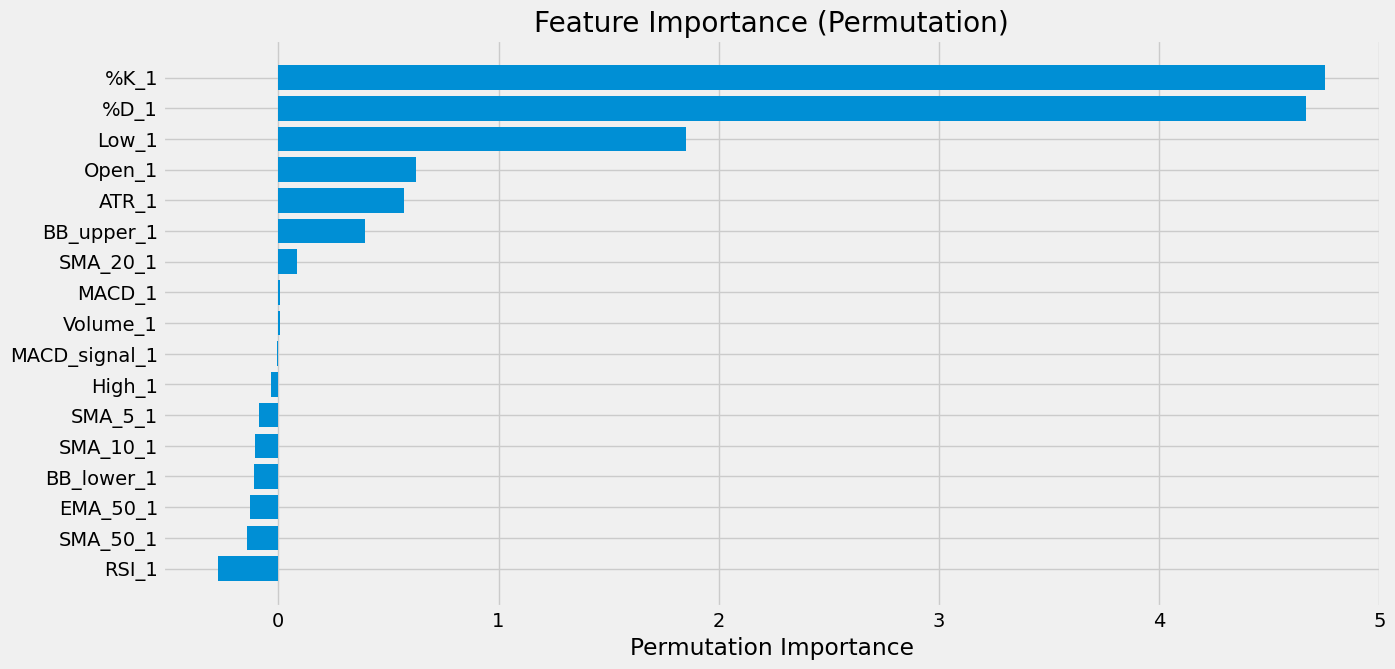

In [184]:
# Model training
features = ['SMA_5_1','SMA_10_1','SMA_20_1','SMA_50_1', 'EMA_50_1', 'RSI_1',
       'MACD_1', 'MACD_signal_1','BB_upper_1', 'BB_lower_1', '%K_1', '%D_1', 
       'ATR_1','Volume_1','Open_1', 'High_1','Low_1']
X = df[features].dropna()
y = df['Log_Pct_Returns_1'][X.index]

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Converting scaled features into dataframe
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Initialize Support Vector regression model
model = SVR(kernel='linear')

model.fit(X_scaled, y)

# Calculate permutation importance
perm_importance = permutation_importance(model, X_scaled, y, n_repeats=30, random_state=42)

# Get feature names
feature_names = X.columns

# Sort feature importance
sorted_idx = perm_importance.importances_mean.argsort()

# Plot permutation importance
plt.figure(figsize=(14, 7))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance (Permutation)')
plt.show()


In [185]:
# Model training
features = ['SMA_5_1','SMA_10_1','SMA_20_1','EMA_50_1',
       'MACD_1', 'MACD_signal_1','BB_upper_1', 'BB_lower_1', '%K_1', '%D_1', 
       'ATR_1','Volume_1','Open_1', 'High_1','Low_1']
X = df[features].dropna()
y = df['Log_Pct_Returns_1'][X.index]

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Converting scaled features into dataframe
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Initialize Support Vector regression model
model = SVR(kernel='linear')

# Time series split for cross-validation
tscv = TimeSeriesSplit(n_splits=10)

# Metrics list to store scores for each fold
mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []

# Perform cross-validation
for train_index, test_index in tscv.split(X_scaled):
    X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse_scores.append(mean_squared_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Calulate mean and standard deviation of the scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Print Results
print("TimeSeriesSplit Cross-Validation MSE:", mean_mse)
print("TimeSeriesSplit Cross-Validation MSE Std Dev:", std_mse)
print("TimeSeriesSplit Cross-Validation RMSE:", mean_rmse)
print("TimeSeriesSplit Cross-Validation RMSE Std Dev:", std_rmse)
print("TimeSeriesSplit Cross-Validation MAE:", mean_mae)
print("TimeSeriesSplit Cross-Validation MAE Std Dev:", std_mae)
print("TimeSeriesSplit Cross-Validation R2:", mean_r2)
print("TimeSeriesSplit Cross-Validation R2 Std Dev:", std_r2)


TimeSeriesSplit Cross-Validation MSE: 0.001789433071012135
TimeSeriesSplit Cross-Validation MSE Std Dev: 0.0009640979051817837
TimeSeriesSplit Cross-Validation RMSE: 0.04111464694822666
TimeSeriesSplit Cross-Validation RMSE Std Dev: 0.00995082294761649
TimeSeriesSplit Cross-Validation MAE: 0.03349112713722979
TimeSeriesSplit Cross-Validation MAE Std Dev: 0.00694365741146872
TimeSeriesSplit Cross-Validation R2: -0.6929267402792145
TimeSeriesSplit Cross-Validation R2 Std Dev: 0.6838832021831694
